# Librerías

In [1]:
## Tratamiento de datos
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
## Funciones algebráicas
import numpy as np
## Visualización
import matplotlib.pyplot as plt
import seaborn as sns
## Machine Learning y preprocesamiento de datos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
## Modelos de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
## Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV
## Modelo de mínimos cuadrados ordinarios
import statsmodels.api as sm
## Factor de inflación de la varianza
from statsmodels.stats.outliers_influence import variance_inflation_factor
## Métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
## Contador
from collections import Counter
## Eliminación de avisos
import warnings
warnings.filterwarnings('ignore')

# Carga del set de datos

In [2]:
df=pd.read_csv('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [3]:
# Dimensión del set de datos
print(df.shape)

(21613, 21)


**El set de datos consta de 21613 observaciones y 21 variables**

In [4]:
## Información sobre el set de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Definición de variables:
* id: ID único para cada casa vendida
* date: Fecha de la venta de la casa
* price: Precio de cada vivienda vendida
* bedrooms: Número de dormitorios
* bathrooms: número de baños, donde .5 representa una habitación con inodoro pero sin ducha
* sqft_living: pies cuadrados del espacio habitable interior de los apartamentos
* sqft_lot: pies cuadrados del espacio terrestre
* floors: Número de pisos
* waterfront: una variable ficticia que indica si el apartamento tenía vistas al mar o no
* view: un índice de 0 a 4 de qué tan buena era la vista de la propiedad
* condition: un índice de 1 a 5 sobre la condición del apartamento,
* grade: un índice del 1 al 13, en el que el 1 al 3 no corresponde a la construcción y el diseño de edificios,
* el 7 tiene un nivel promedio de construcción y diseño y el 11 al 13 tiene un nivel de construcción y diseño de alta calidad.
* sqft_above: los pies cuadrados del espacio interior de la vivienda que está por encima del nivel del suelo
* sqft_basement: los pies cuadrados del espacio interior de la vivienda que está por debajo del nivel del suelo
* yr_built: el año en que se construyó la casa inicialmente
* yr_renovated: el año de la última renovación de la casa
* zipcode: en qué área de código postal se encuentra la casa
* lat:Latitud
* long:Longitud
* sqft_living15:los pies cuadrados de espacio habitable interior de la vivienda para los 15 vecinos más cercanos
* sqft_lot15:los pies cuadrados de los lotes de terreno de los 15 vecinos más cercanos

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


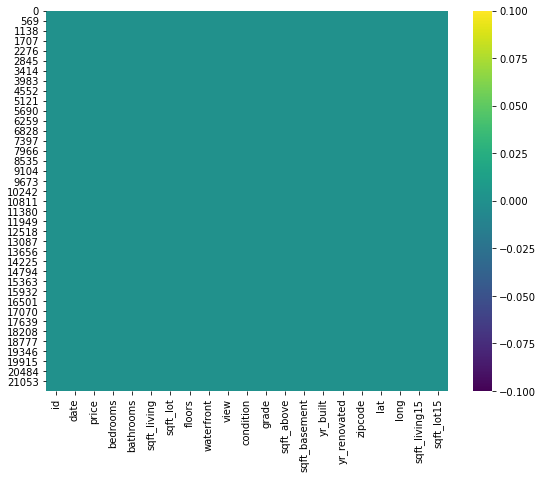

In [5]:
# Presencia de valores nulos

print(df.isnull().sum())

### Visualización
plt.figure(figsize=(9,7))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

**Tal y como se puede observar, no existe presencia de valores nulos.**

# Análisis Exploratorio de Datos.

**Como se ha descrito anteriormente, el set de datos consta de un total de 21.613 observaciones distribuidas sobre un total de 21 variables.**

In [6]:
# Descripción de las variables
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00"
mean,"4,580,301,520.86","540,088.14",3.37,2.11,"2,079.90","15,106.97",1.49,0.01,0.23,3.41,7.66,"1,788.39",291.51,"1,971.01",84.40,"98,077.94",47.56,-122.21,"1,986.55","12,768.46"
std,"2,876,565,571.31","367,127.20",0.93,0.77,918.44,"41,420.51",0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,"27,304.18"
min,"1,000,102.00","75,000.00",0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"2,123,049,194.00","321,950.00",3.00,1.75,"1,427.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,"3,904,930,410.00","450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,"7,308,900,445.00","645,000.00",4.00,2.50,"2,550.00","10,688.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00"


**Existen dos variables, concretamente 'id' y 'date' (variable string) que se pueden eliminar porque no muestran información de interés para el propósito que se persigue**

In [7]:
# Eliminación de las variables 'id' y 'date'

df=df.drop(columns=['id', 'date'])

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,"221,900.00",3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,"538,000.00",3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,"180,000.00",2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,"604,000.00",4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,"510,000.00",3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [8]:
# Variables numéricas continuas

df.select_dtypes(include='float64').columns

Index(['price', 'bathrooms', 'floors', 'lat', 'long'], dtype='object')

In [9]:
# Variables numéricas discretas

df.select_dtypes(include='int64').columns

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
# Categorías representadas en las variables numéricas discretas:

for col in (df.select_dtypes(include='int64').columns):
    print(col+':')
    print('='*70)
    print(df[col].unique())
    print('='*70)

bedrooms:
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
sqft_living:
[1180 2570  770 ... 3087 3118 1425]
sqft_lot:
[ 5650  7242 10000 ...  5813  2388  1076]
waterfront:
[0 1]
view:
[0 3 4 2 1]
condition:
[3 5 4 1 2]
grade:
[ 7  6  8 11  9  5 10 12  4  3 13  1]
sqft_above:
[1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 2310  700 1080 2520 2780 1560 1450 1720 2910 1620
 1360 2070 2460 1390 2140 1320 1340 1550  940 1380 3670 2370 1130  980
 3540 2500 1760 1030 1780 3400 2680 1670 2590  820 1220 2440 2090 1100
 1330 1420 1690 2150 1910 1350 1940  900 1630 2714  850 1870 1950 2760
 2020 1120 1480 1230 2

**Como se puede observar, hay algunas de estas variables que muestran pocas categorías, tal y como 'waterfront' o 'view'. No obstante existen otras muchas que muestran una enorme cantidad de categorías.**

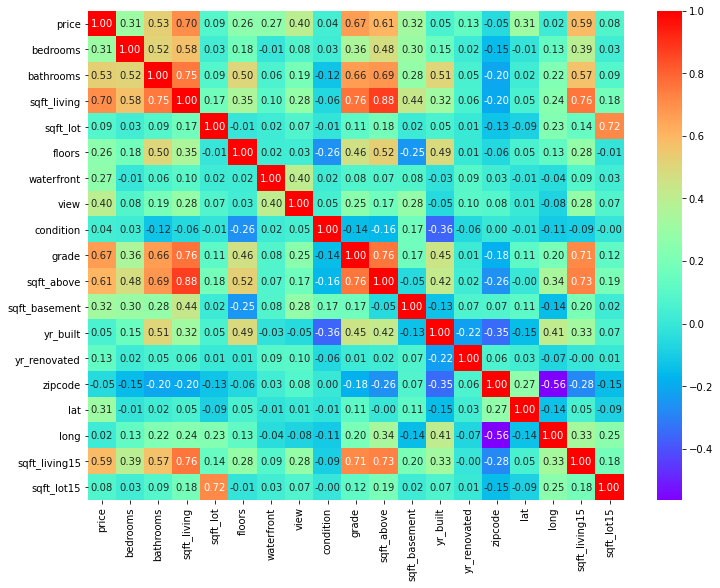

In [11]:
## Matriz de correlación de las variables.

plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='rainbow')
plt.show()

En la matriz de correlación, se puede observar que existen algunas Variables que presentan una fuerte correlación con la variable precio, concretamente sqft_living,
grade, sqft_above. No obstante, algunas de las variables independientes parecen mostrar alta correlación entre ellas, por lo que podría presentarse un problema de multicolinealidad.
Este es el caso de la variable sqft_above con la varriables sqft_living. Por ello, debemos comprobar si realmente existen problemas de multicolinealidad entre algunas de las variables.

Antes de la comprobar la existencia de multicolinealidad, se va a observar que distribución presenta cada una de las variables.

## Distribución de las variables.

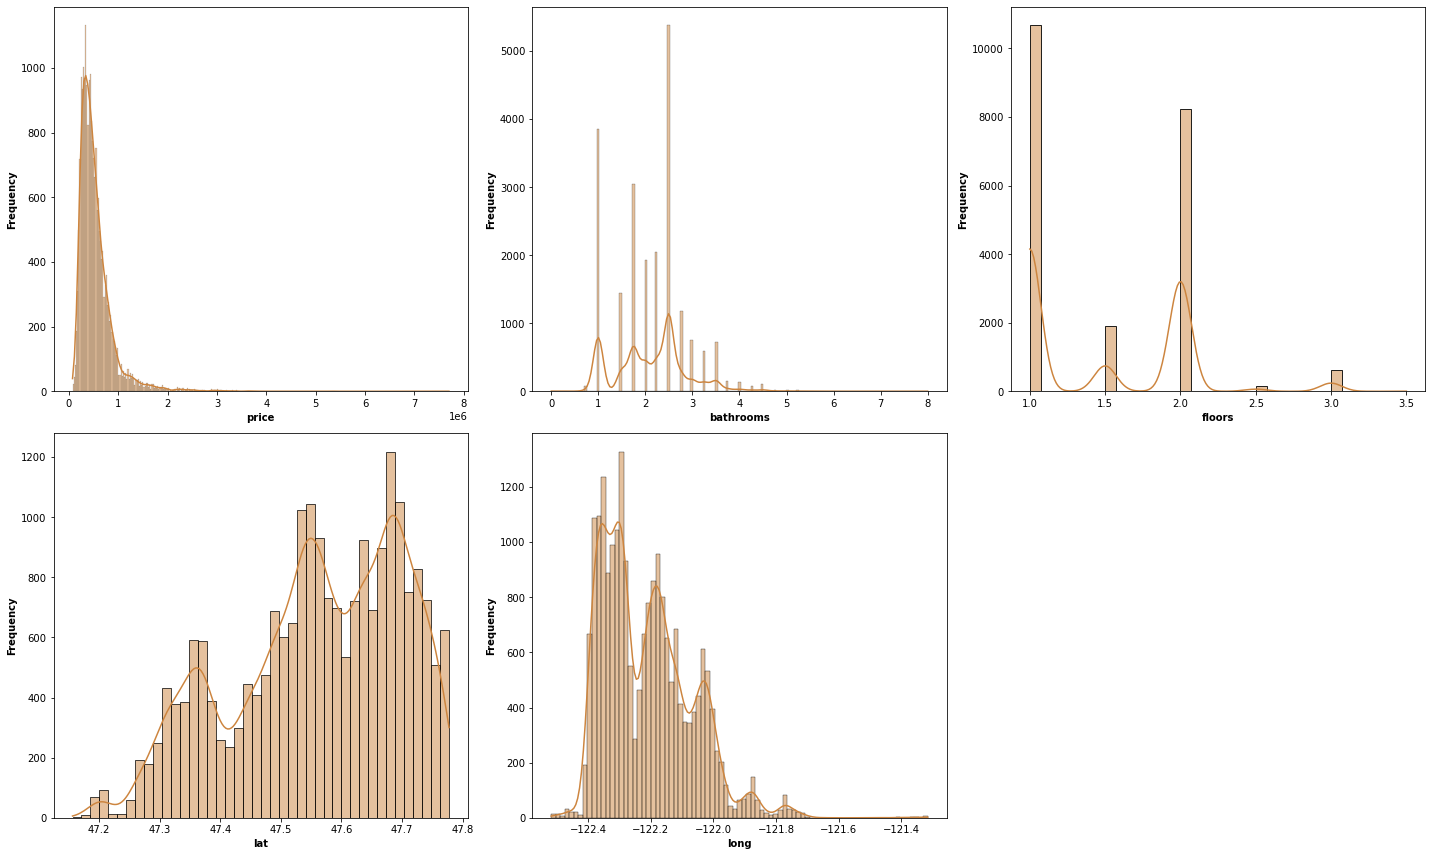

In [12]:
# Numéricas continuas

plt.figure(figsize=(20,12))

for i, col in enumerate(df.select_dtypes(include='float64').columns):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df, x=col, stat='count', kde=True, color='peru')
    plt.xlabel(col, weight='bold')
    plt.ylabel('Frequency', weight='bold')
plt.tight_layout(pad=1.1)
plt.show()

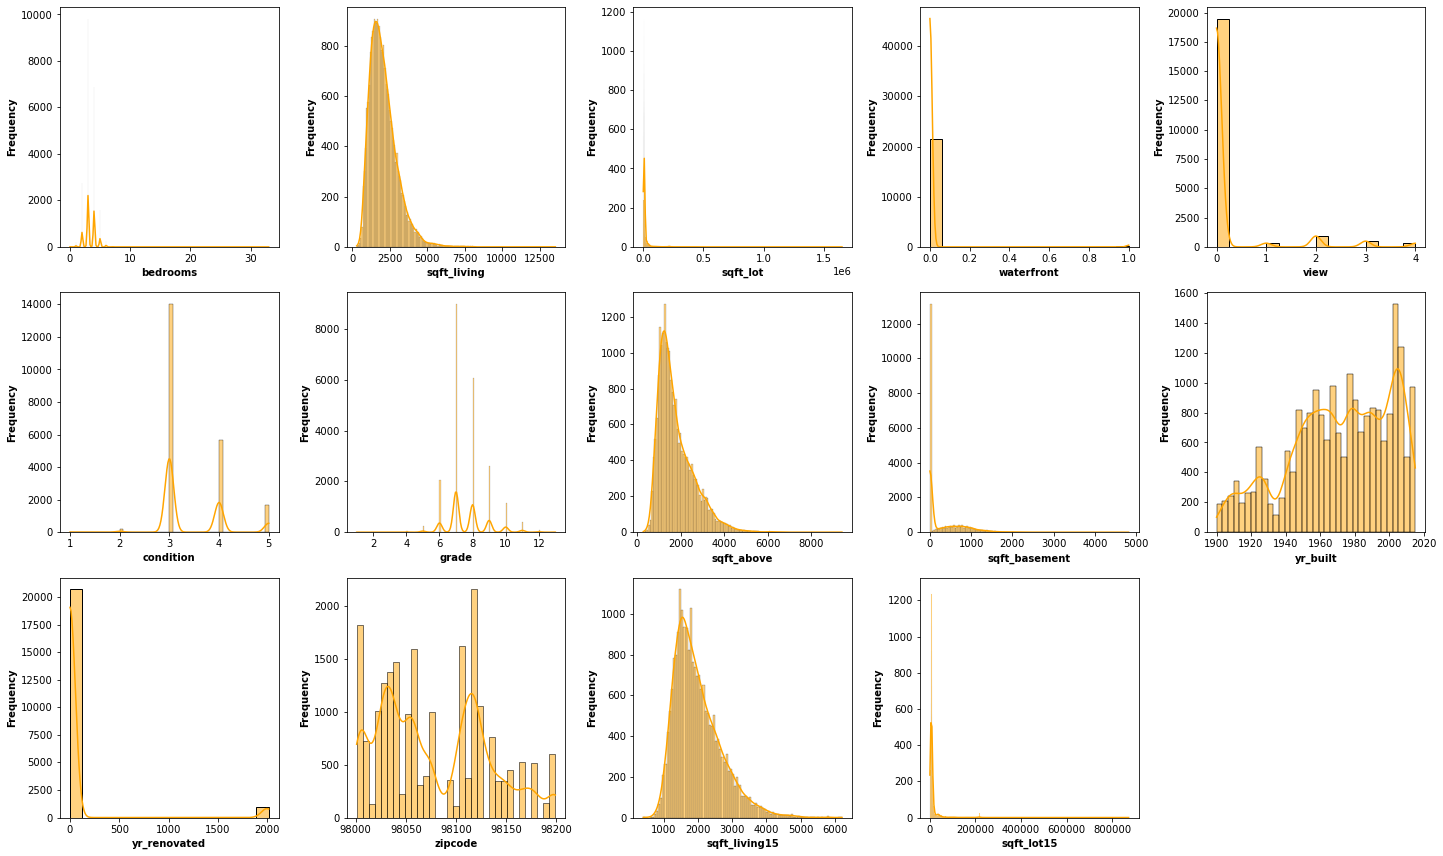

In [13]:
# Numéricas discretas

plt.figure(figsize=(20,12))

for i, col in enumerate(df.select_dtypes(include='int64').columns):
    plt.subplot(3,5,i+1)
    sns.histplot(data=df, x=col, stat='count', kde=True, color='orange')
    plt.xlabel(col, weight='bold')
    plt.ylabel('Frequency', weight='bold')
plt.tight_layout(pad=1.1)
plt.show()

Como se puede observar ninguna de las variables numéricas continuas presenta una distribución normal. Por ejemplo, la variable precio presenta una clara asimetría.
Así mismo, variables que en principio son discretas, aunque parecen mostrar una escala continua en el intervalo en el que están definidas, como sqft_above
o living15,tampoco presentan una distribución normal.

## Preprocesamiento de las variables independientes.

Antes de determinar si existe multicolinealidad, se procede a la estandarización de las variables. Este escalado permite que todas las variables se presentan en
un rango de magnitud que resulte comparable. Además, la estadarización permite establecer como valor medio (0) y desviación estándar (1) el característico de
una distribución normal estándar.

In [14]:
# Separación de las variable dependiente e independiente

y=df[['price']]

X=df.loc[:, df.columns!='price']

In [15]:
# Estandarización de las variables

scale=StandardScaler()

X_scale=scale.fit_transform(X)

X=pd.DataFrame(X_scale, columns=X.columns)

## Presencia de multicolinealidad
### Método de Mínimos Cuadrados Ordinarios (OLS) y Factor de Inflación de la Varianza (VIF)

In [16]:
# Modelo de Mínimos cuadrados ordinarios

## Se añade constante
X=sm.add_constant(X)

## Se entrena modelo

model=sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:47:15   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.401e+05   1368.905    394.540

Se puede observar que parece que todas las variables, excepto la correspondiente a la planta en la que está ubicada la vivienda, son significativas en el modelo.
Esto significa que tiene poder explicativo sobre la respuesta del precio.

In [17]:
# Factor de inflación de la varianza.
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif=vif.sort_values(by=['VIF'], ascending=False)
vif

,Features,VIF
10,sqft_above,inf
3,sqft_living,inf
11,sqft_basement,inf
9,grade,3.42
2,bathrooms,3.35
17,sqft_living15,2.98
12,yr_built,2.43
18,sqft_lot15,2.14
4,sqft_lot,2.10
5,floors,2.01


Se puede observar que las variables sqft_above, sqft_living, sqft_basement presentan con toda seguridad multicolinealidad.

Por ello, se eliminan las variables sqft_above y sqft_basement. También, teniendo en cuenta la matriz de correlación, se procede a la eliminación de la variable
sqft_living15, la cual también mostraba una alta correlación con sqft_living.

In [18]:
# Eliminación de variables que presentan multicolinealidad

X=X.drop(columns=['sqft_above', 'sqft_basement', 'sqft_living15'])
X.head()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,1.00,-0.40,-1.45,-0.98,-0.23,-0.92,-0.09,-0.31,-0.63,-0.56,-0.54,-0.21,1.87,-0.35,-0.31,-0.26
1,1.00,-0.40,0.18,0.53,-0.19,0.94,-0.09,-0.31,-0.63,-0.56,-0.68,4.75,0.88,1.16,-0.75,-0.19
2,1.00,-1.47,-1.45,-1.43,-0.12,-0.92,-0.09,-0.31,-0.63,-1.41,-1.29,-0.21,-0.93,1.28,-0.14,-0.17
3,1.00,0.68,1.15,-0.13,-0.24,-0.92,-0.09,-0.31,2.44,-0.56,-0.20,-0.21,1.09,-0.28,-1.27,-0.28
4,1.00,-0.40,-0.15,-0.44,-0.17,-0.92,-0.09,-0.31,-0.63,0.29,0.54,-0.21,-0.07,0.41,1.20,-0.19


In [19]:
# Verificación de la ausencia de multicolinealidad

model=sm.OLS(y,X).fit()
print(model.summary())

vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif=vif.sort_values(by=['VIF'], ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     3332.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:47:21   Log-Likelihood:            -2.9466e+05
No. Observations:               21613   AIC:                         5.893e+05
Df Residuals:                   21597   BIC:                         5.895e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.401e+05   1372.184    393.597   

,Features,VIF
3,sqft_living,4.30
2,bathrooms,3.26
9,grade,3.02
10,yr_built,2.43
15,sqft_lot15,2.13
4,sqft_lot,2.09
14,long,1.71
1,bedrooms,1.65
12,zipcode,1.65
5,floors,1.61


Como se puede observar, el valor máximo del factor de inflación de la varianza es menor de 5, por lo que podría considerarse que ya no existen problemas de
multicolinealidad. Además, tabla resumen del modelo ya no indica que pueden existir problemas de multicolinealidad.

Una vez seleccionadas las variables, se estima que modelo de regresión (entre tres modelos de regresión) tiene una mayor precisión en la predicción.

# Modelado
## Cross validation score para estimar que modelo es más preciso.

In [20]:
# Variables independientes eliminando la constante
X=X.drop(columns=['const'])

In [21]:
# función cv comparison
def cv_comparison(models, X, y, cv):
    cv_accuracies=pd.DataFrame()
    maes=[]
    mses=[]
    r2s=[]
    accs=[]
    for i, model in enumerate(models):
        ## mean_absolute_error
        mae=-np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg=np.mean(mae)
        ## mean_squared_error
        mse=-np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg=np.mean(mse)
        ## r2_score
        r2=np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg=np.mean(r2)
        acc=100 - (100 * (np.array(mae) * len(X))) / sum(y)
        accs.append(np.round(acc, 4))
        acc_avg=np.mean(acc)
        cv_accuracies[r_model[i]]=[mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index=['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs

In [22]:
# modelos

mlr=LinearRegression()
rfr=RandomForestRegressor(random_state=42)
tree=DecisionTreeRegressor(random_state=42)
xgbr=XGBRegressor(random_state=42)


models=[mlr, rfr, tree, xgbr]

r_model=['Multiple Linear Regression', 'Random Forest Regressor', 'Decision Tree Regressor', 'Extreme Gradient Boosting Regressor']

**Antes de ejecutar, la función se debe transformar la variable y a una serie. Esto es debido a que, para obtener la accuracy, se
necesita hacer el sumatorio de la variable, lo cual no es posible si está en forma de dataframe**

In [23]:
y_1=df['price']

In [24]:
cv_accuracies, maes, mses, r2s, accs=cv_comparison(models, X, y_1, 5)

In [25]:
cv_accuracies

,Multiple Linear Regression,Random Forest Regressor,Decision Tree Regressor,Extreme Gradient Boosting Regressor
Mean Absolute Error,"126,686.30","69,440.02","99,691.02","68,964.03"
Mean Squared Error,"41,130,965,931.07","16,444,188,534.33","33,002,600,609.27","15,594,549,205.24"
R^2,0.69,0.88,0.75,0.88
Accuracy,76.54,87.14,81.54,87.23


## Presencia de valores atípicos (boxplot).

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      21613 non-null  float64
 1   bathrooms     21613 non-null  float64
 2   sqft_living   21613 non-null  float64
 3   sqft_lot      21613 non-null  float64
 4   floors        21613 non-null  float64
 5   waterfront    21613 non-null  float64
 6   view          21613 non-null  float64
 7   condition     21613 non-null  float64
 8   grade         21613 non-null  float64
 9   yr_built      21613 non-null  float64
 10  yr_renovated  21613 non-null  float64
 11  zipcode       21613 non-null  float64
 12  lat           21613 non-null  float64
 13  long          21613 non-null  float64
 14  sqft_lot15    21613 non-null  float64
dtypes: float64(15)
memory usage: 2.5 MB


In [27]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
count,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00"
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.62,-2.75,-1.95,-0.35,-0.92,-0.09,-0.31,-3.70,-5.66,-2.42,-0.21,-1.44,-2.92,-2.17,-0.44
25%,-0.40,-0.47,-0.71,-0.24,-0.92,-0.09,-0.31,-0.63,-0.56,-0.68,-0.21,-0.84,-0.64,-0.81,-0.28
50%,-0.40,0.18,-0.18,-0.18,0.01,-0.09,-0.31,-0.63,-0.56,0.14,-0.21,-0.24,0.08,-0.11,-0.19
75%,0.68,0.50,0.51,-0.11,0.94,-0.09,-0.31,0.91,0.29,0.88,-0.21,0.75,0.85,0.63,-0.10
max,31.86,7.64,12.48,39.50,3.71,11.47,4.91,2.44,4.55,1.50,4.81,2.26,1.57,6.38,31.44


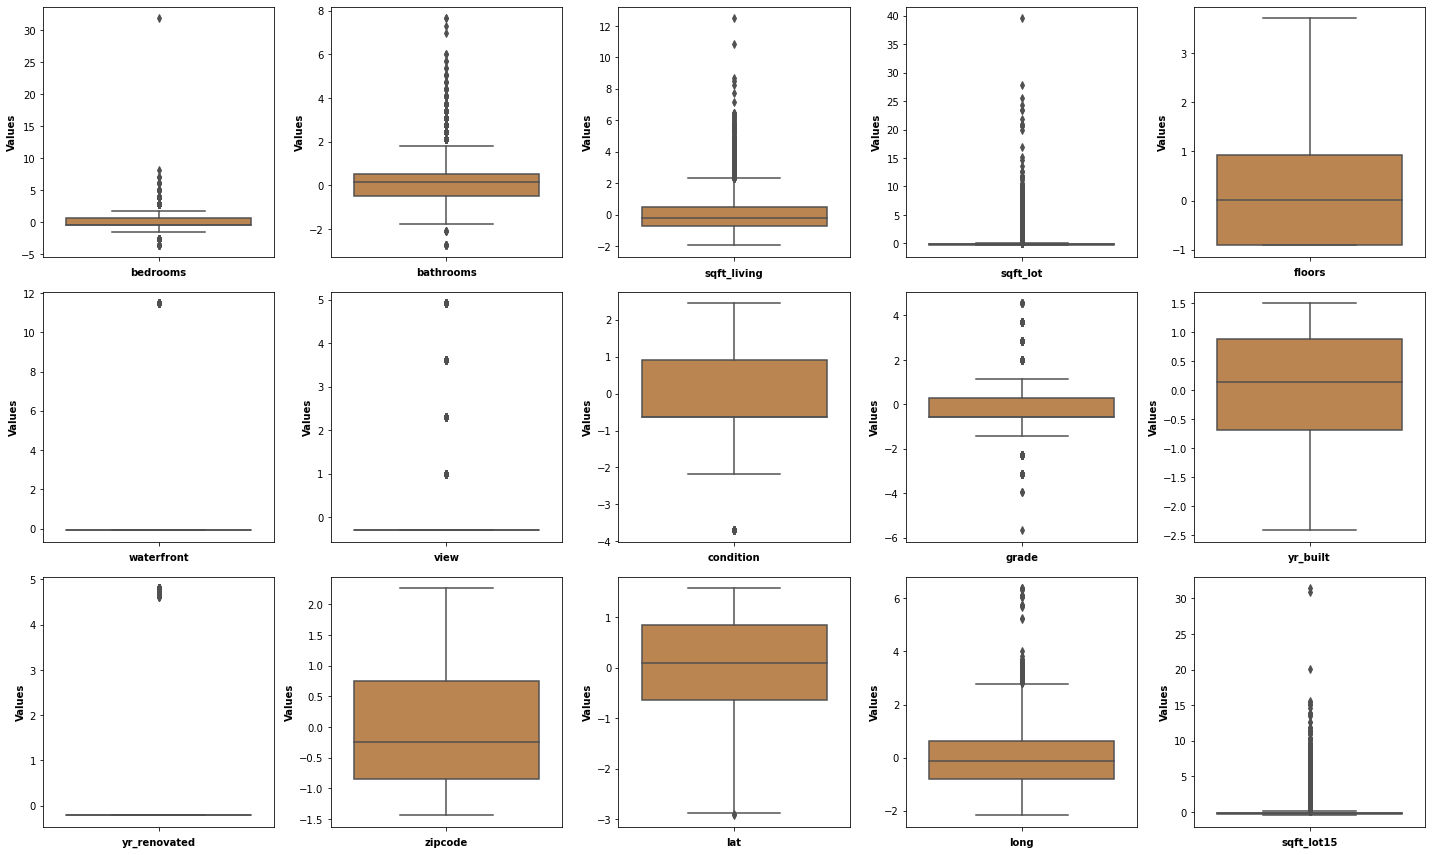

In [28]:
# Variables independientes transformadas
features=X.columns
plt.figure(figsize=(20,12))
for i, col in enumerate(features):
    plt.subplot(3,5,i+1)
    sns.boxplot(data=X, y=col, color='peru')
    plt.xlabel(col, weight='bold')
    plt.ylabel('Values', weight='bold')
plt.tight_layout(pad=1.1)
plt.show()

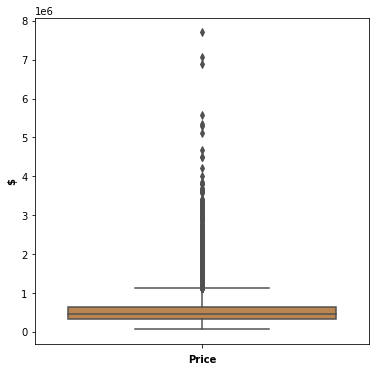

In [29]:
# Variable dependiente

plt.figure(figsize=(6,6))
sns.boxplot(data=df, y='price', color='peru')
plt.xlabel('Price', weight='bold')
plt.ylabel('$', weight='bold')
plt.show()

Se puede observar perfectamente como prácticamente todas las variables presentan valores atípicos,
resaltando sobre todo la variable precio y las relacionadas con los metros cuadrados de vivienda.

## Eliminación de los valores atípicos de la variable precio.

In [30]:
data=pd.concat([X, y], axis=1)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,price
0,-0.40,-1.45,-0.98,-0.23,-0.92,-0.09,-0.31,-0.63,-0.56,-0.54,-0.21,1.87,-0.35,-0.31,-0.26,"221,900.00"
1,-0.40,0.18,0.53,-0.19,0.94,-0.09,-0.31,-0.63,-0.56,-0.68,4.75,0.88,1.16,-0.75,-0.19,"538,000.00"
2,-1.47,-1.45,-1.43,-0.12,-0.92,-0.09,-0.31,-0.63,-1.41,-1.29,-0.21,-0.93,1.28,-0.14,-0.17,"180,000.00"
3,0.68,1.15,-0.13,-0.24,-0.92,-0.09,-0.31,2.44,-0.56,-0.20,-0.21,1.09,-0.28,-1.27,-0.28,"604,000.00"
4,-0.40,-0.15,-0.44,-0.17,-0.92,-0.09,-0.31,-0.63,0.29,0.54,-0.21,-0.07,0.41,1.20,-0.19,"510,000.00"


In [31]:
for col in data.columns:
    print(f'{col}: {data[col].unique()}')

bedrooms: [-0.39873715 -1.47395936  0.67648506  1.75170727 -2.54918156  2.82692947
  3.90215168 -3.62440377  4.97737389  6.0525961   8.20304051  7.1278183
 31.85792907]
bathrooms: [-1.44746357  0.1756067   1.14944885 -0.14900736  3.09713317 -0.79823546
  0.50022075 -0.47362141  0.8248348   1.47406291  2.44790506  1.79867696
 -1.77207762  3.42174722  3.74636128  2.77251912  2.12329101 -2.74591978
 -1.12284952  4.07097533  5.04481749 -2.09669167  4.39558938  6.01865965
  4.72020343  7.64172991  6.9925018   7.31711586  5.36943154  5.69404559]
sqft_living: [-0.97983502  0.53363434 -1.42625404 ...  1.09655784  1.13031147
 -0.71307244]
sqft_lot: [-0.22832133 -0.18988538 -0.12329847 ... -0.22438599 -0.30707641
 -0.33875227]
floors: [-0.915427    0.93650577  0.01053939  2.78843855  1.86247216  3.71440494]
waterfront: [-0.08717263 11.4714904 ]
view: [-0.30575946  3.60915718  4.91412939  2.30418496  0.99921275]
condition: [-0.62918687  2.44429394  0.90755354 -3.70266769 -2.16592728]
grade: [-0.5

In [32]:
# Variables sobre las que se van a eliminar los valores atípicos

outliers_features=data[['price', 'sqft_living', 'sqft_lot15', 'sqft_lot15']].columns

In [33]:
# Definición del rango intercuartil (iqr)
outliers_index=[]
for col in outliers_features:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    iqr=Q3-Q1
    index=data[(data[col]<Q1-1.5*iqr)|(data[col]>Q3+1.5*iqr)].index
    outliers_index.extend(index)
dict_index=Counter(outliers_index)
index_outliers=[key for key, value in dict_index.items() if value >= 1]

In [34]:
data=data.drop(index=index_outliers)

In [35]:
data.shape

(18467, 16)

**Se han eliminado aquellas observaciones que se corresponden con valores atípicos. Tal y como se puede observar,
el set de datos ha pasado de contener un total de 21.613 observaciones a 14.532. Ahora se va comprobar como ha disminuido
la presencia de valores atípicos.**

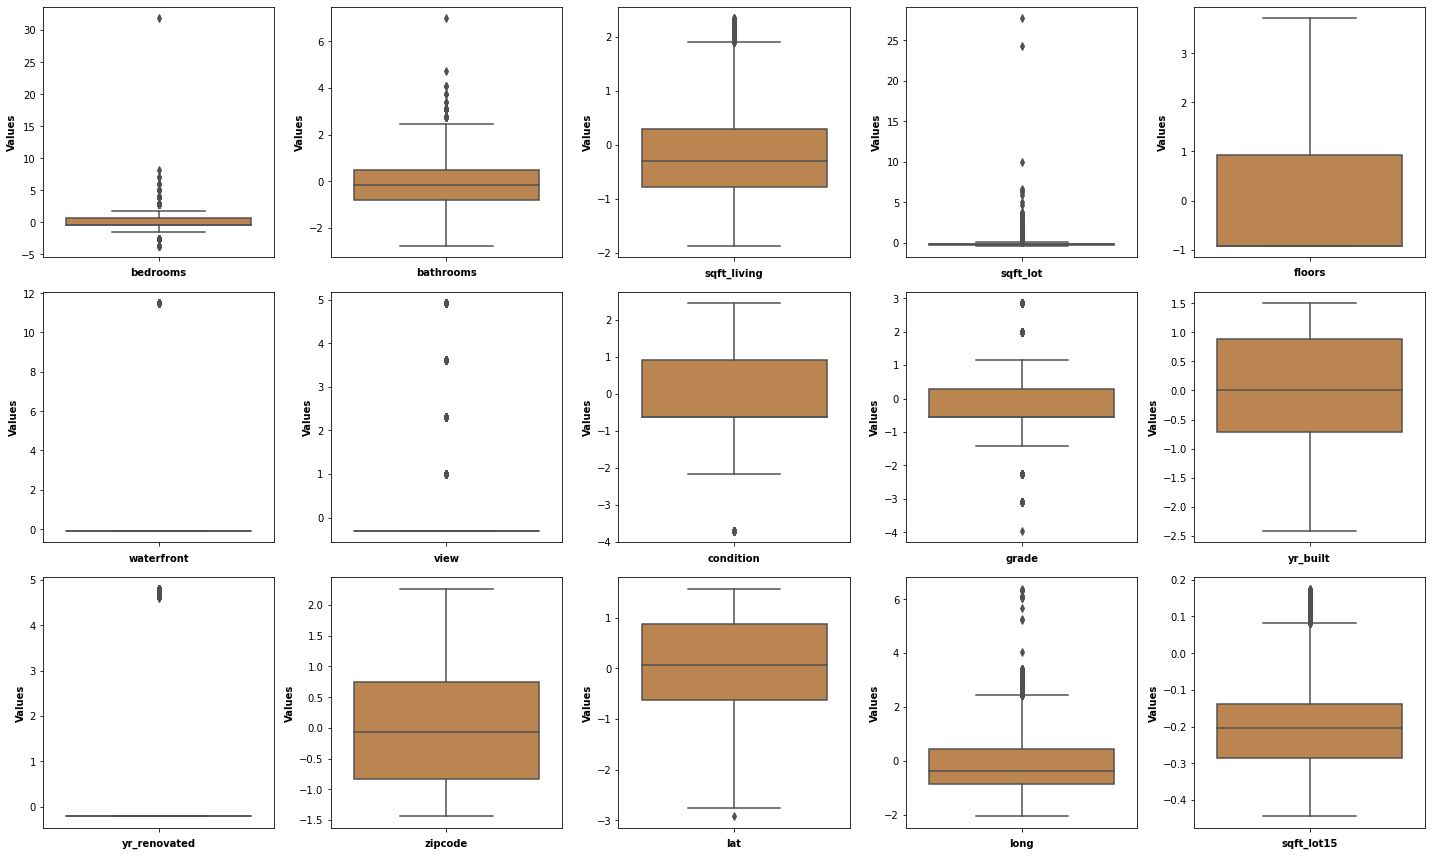

In [36]:
# Variables independientes transformadas
features=data.loc[:, data.columns!='price'].columns
plt.figure(figsize=(20,12))
for i, col in enumerate(features):
    plt.subplot(3,5,i+1)
    sns.boxplot(data=data, y=col, color='peru')
    plt.xlabel(col, weight='bold')
    plt.ylabel('Values', weight='bold')
plt.tight_layout(pad=1.1)
plt.show()

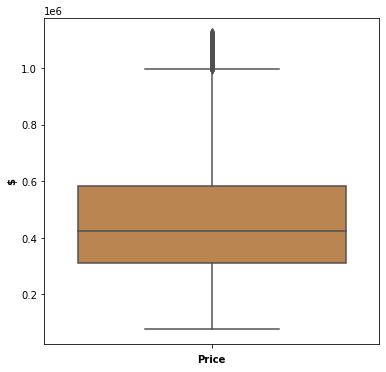

In [37]:
# Variable dependiente

plt.figure(figsize=(6,6))
sns.boxplot(data=data, y='price', color='peru')
plt.xlabel('Price', weight='bold')
plt.ylabel('$', weight='bold')
plt.show()

**Se puede observar como ha habido una reducción enorme de la cantidad de valores atípicos.
Se va a volver a ejecutar la función cross_validation para ver si las métricas de error
muestran valores más bajos.**

In [38]:
# Separación de las variables independientes de la dependiente.

X1=data.loc[:, data.columns!='price']
y1=data[['price']]
y1_s=data['price']

# Función cross_validation
cv_accuracies, maes, mses, r2s, accs=cv_comparison(models, X1, y1_s, 5)



In [39]:
cv_accuracies

,Multiple Linear Regression,Random Forest Regressor,Decision Tree Regressor,Extreme Gradient Boosting Regressor
Mean Absolute Error,"85,805.97","51,542.76","73,605.57","50,939.22"
Mean Squared Error,"12,993,553,204.98","5,567,982,288.76","11,260,484,682.96","5,276,690,674.25"
R^2,0.69,0.87,0.73,0.87
Accuracy,81.60,88.95,84.22,89.08


**Como se puede observar, tanto el error absoluto, como error cuadrático, presentan un valor significativamente inferior
tras eliminar los valores atípicos de las variables precio y algunas de las asociadas a los m2. Además, se puede ver que
el coeficiente de derteminación es prácticamente similar, lo que indica que la eliminación de esas observaciones no ha supuesto
pérdida de información.**

**Se va a proceder a realizar un ajuste de los parámetros para comprobar si puede producirse algún tipo de mejora.**

# Ajuste de Hiperparámetros

In [40]:
# Parámetros para random forest, Decision tree y Xgboost

params_grid=[
    {'n_estimators': [500, 700, 900],
     'max_depth': [None, 3, 10, 20],
     'min_samples_split': [1, 2, 3]
    },
    {'criterion': ['mse', 'mae'],
     'min_samples_split': [10, 20, 40],
     'max_depth': [2, 6, 8],
     'min_samples_leaf': [20, 40, 100],
     'max_leaf_nodes': [5, 20, 100],
    },
    {'nthread':[4], #when use hyperthread, xgboost may become slower
     'objective':['reg:squarederror'],
     'learning_rate': [.03, 0.05, .07], #so called `eta` value
     'max_depth': [5, 6, 7],
     'min_child_weight': [4],
     'silent': [1],
     'subsample': [0.7],
     'colsample_bytree': [0.7],
     'n_estimators': [500]
    }
]

In [41]:
rfr=RandomForestRegressor(random_state=42)
tree=DecisionTreeRegressor(random_state=42)
xgbr=XGBRegressor(random_state=42)

models=[rfr, tree, xgbr]

In [42]:
def grid_search(models, X, y, cv):
    score=[]
    best_params=[]
    best_estimator=[]
    for i, model in enumerate(models):
        reg_model=GridSearchCV(estimator=model,
                               param_grid=params_grid[i],
                               scoring='r2',
                               cv=cv,
                               verbose=1,
                               n_jobs=-1
                               )
        reg_model.fit(X, y)
        score.append(np.round(reg_model.best_score_, 2)*100)
        best_params.append(reg_model.best_params_)
        best_estimator.append(reg_model.best_estimator_)

    return score, best_estimator, best_params

In [43]:
'''score, best_estimator, best_params=grid_search(models, X1, y1, 3)'''

'score, best_estimator, best_params=grid_search(models, X1, y1, 3)'

In [44]:
'''score= [86.0, 78.0, 88.0]'''

'score= [86.0, 78.0, 88.0]'

In [45]:
'''best_params=[{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 700},
             {'criterion': 'mse',
              'max_depth': 8,
              'max_leaf_nodes': 100,
              'min_samples_leaf': 20,
              'min_samples_split': 10},
             {'colsample_bytree': 0.7,
              'learning_rate': 0.03,
              'max_depth': 7,
              'min_child_weight': 4,
              'n_estimators': 500,
              'nthread': 4,
              'objective': 'reg:squarederror',
              'silent': 1,
              'subsample': 0.7}]'''

"best_params=[{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 700},\n             {'criterion': 'mse',\n              'max_depth': 8,\n              'max_leaf_nodes': 100,\n              'min_samples_leaf': 20,\n              'min_samples_split': 10},\n             {'colsample_bytree': 0.7,\n              'learning_rate': 0.03,\n              'max_depth': 7,\n              'min_child_weight': 4,\n              'n_estimators': 500,\n              'nthread': 4,\n              'objective': 'reg:squarederror',\n              'silent': 1,\n              'subsample': 0.7}]"

In [46]:
rfr=RandomForestRegressor(n_estimators=700, random_state=42)

tree_reg=DecisionTreeRegressor(max_depth=8,
                               max_leaf_nodes=100,
                               min_samples_leaf=20,
                               min_samples_split=10,
                               random_state=42)

xgbr=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                  colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
                  importance_type='gain', interaction_constraints='',
                  learning_rate=0.03, max_delta_step=0, max_depth=7,
                  min_child_weight=4, missing='nan', monotone_constraints='()',
                  n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
                  objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
                  scale_pos_weight=1, silent=1, subsample=0.7, tree_method='exact',
                  validate_parameters=1, verbosity=None)


# Modelado con Xgboost Regressor

## Set de entrenamiento y evaluación

In [47]:
# Set de entrenamiento y evaluación

X_train, X_test, y_train, y_test=train_test_split(X1, y1, random_state=42, test_size=0.2)

In [48]:
# Entrenamiento del modelo
xgbr=XGBRegressor(colsample_bytree=0.7, learning_rate=0.03,
                  max_depth=7, min_child_weight=4, n_estimators=500,
                  nthread=4, objective='reg:squarederror', subsample=0.7)
xgbr.fit(X_train, y_train)
# Predicción sobre datos de entrenamiento
y_pred_train=xgbr.predict(X_train)
# Predicción sobre datos de evaluación
y_pred=xgbr.predict(X_test)

In [49]:

print(f'R^2 Score con datos de entrenamiento: {round(r2_score(y_train, y_pred_train), 4)}')
print(f'R^2 Score con datos de evaluación: {round(r2_score(y_test, y_pred), 4)}')

R^2 Score con datos de entrenamiento: 0.9456
R^2 Score con datos de evaluación: 0.8785


**Por los resultados obtenidos a través de las métricas calculadas, podría existir overfitting. El modelo predice
con una enorme precisión con los datos entrenamiento con casi un 95%, mientras que con datos desconocidos (test) se produce un cierta pérdida.
Esto resulta muy común en los modelos de aprenzidaje sofisticados como XGBoost, basados en la utilización de numerosos estimadores.**

## Evaluación del modelo de XGBoost con curvas de aprendizaje en base a error

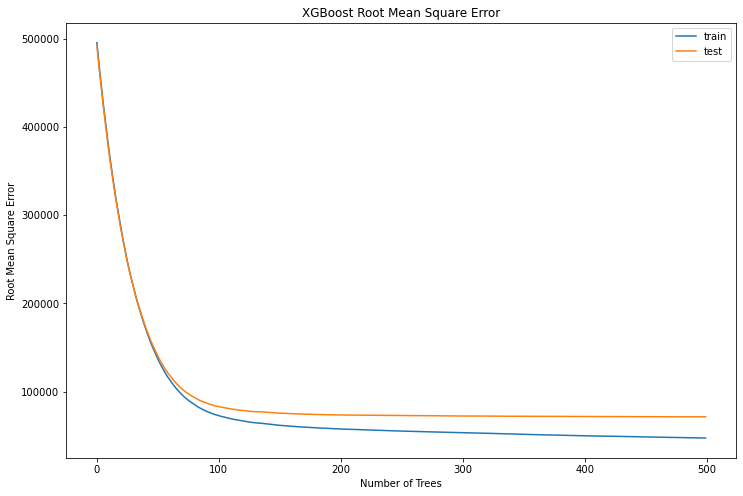

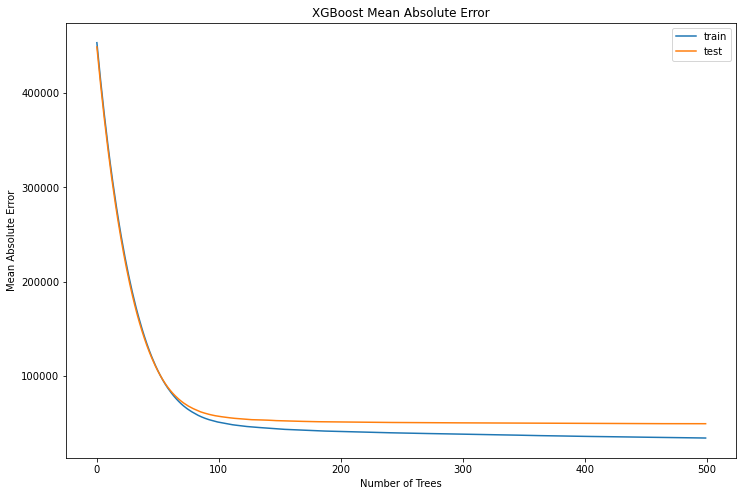

In [50]:
# Definición del set de evaluación
eval_set=[(X_train, y_train), (X_test, y_test)]
# Entrenamiento del modelo indicando las métricas de evaluación
xgbr.fit(X_train, y_train, eval_metric=['rmse', 'mae'], eval_set=eval_set, verbose=False)
# Predicciones para el set de evaluación
y_pred=xgbr.predict(X_test)
# Recuperación de las métricas de rendimiento
results=xgbr.evals_result()
trees=len(results['validation_0']['rmse'])
x_axis=range(0, trees)
# Visualización logloss
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(x_axis, results['validation_0']['rmse'], label='train')
ax.plot(x_axis, results['validation_1']['rmse'], label='test')
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Root Mean Square Error')
ax.legend()
ax.set_title('XGBoost Root Mean Square Error')
plt.show()
# Visualización error
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(x_axis, results['validation_0']['mae'], label='train')
ax.plot(x_axis, results['validation_1']['mae'], label='test')
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Mean Absolute Error')
ax.legend()
ax.set_title('XGBoost Mean Absolute Error')
plt.show()

**Se puede observar como, con los 50-60 primeros estimadores, la disminución del error es prácticamente similar.
A partir de ese momento, se produce una separación de las líneas, siendo ésta es poco significativa debido a que
continua produciéndose, aunque menos pronunciada, una disminución del error, lo que es indicativo de que prácticamente
no existe overfitting.**

## Early stopping para indicar cuando hay riesgo de overfitting
**Generalmente se establece un valor de early_stopping equivalente al 10% del número de estimadores**

In [55]:
# Definición del set de evaluación
eval_set=[(X_train, y_train), (X_test, y_test)]
# Entrenamiento del modelo indicando las métricas de evaluación
xgbr.fit(X_train, y_train, eval_metric=['rmse'], eval_set=eval_set, early_stopping_rounds=50, verbose=False)
# Predicciones para el set de evaluación
y_pred=xgbr.predict(X_test)


In [56]:
xgbr.best_score

71501.070312

In [57]:
xgbr.best_ntree_limit

494

**Las métricas indican que el número de estimadores óptimo es de 494 y a que a partir de ahí se produce un incremento del error,
que podría derivar, si se estableciera un número mayor de estimadores, por ejemplo 1000, en un riesgo elevado de overfitting**

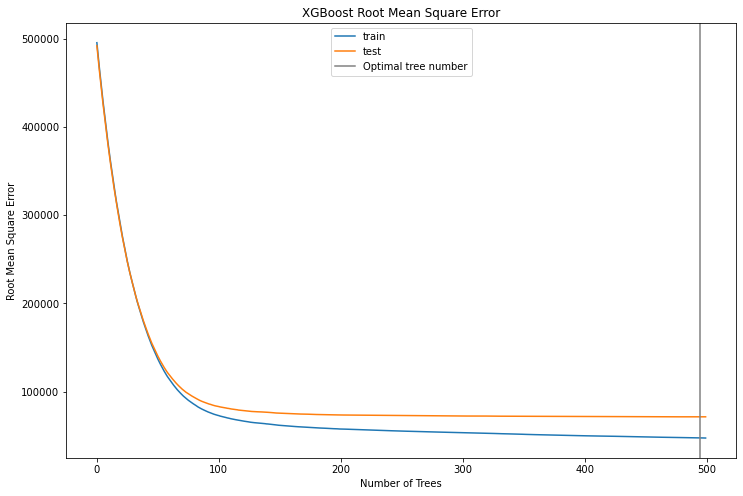

In [61]:
# Recuperación de las métricas de rendimiento
results=xgbr.evals_result()
trees=len(results['validation_0']['rmse'])
x_axis=range(0, trees)
# Visualización logloss
plt.figure(figsize=(12,8))
plt.plot(x_axis, results['validation_0']['rmse'], label='train')
plt.plot(x_axis, results['validation_1']['rmse'], label='test')
plt.axvline(494, color="gray", label="Optimal tree number")
plt.xlabel('Number of Trees')
plt.ylabel('Root Mean Square Error')
plt.legend(loc='best')
plt.title('XGBoost Root Mean Square Error')
plt.show()

## Modelado Final

In [62]:
# Entrenamiento del modelo
xgbr=XGBRegressor(colsample_bytree=0.7, learning_rate=0.03,
                  max_depth=7, min_child_weight=4, n_estimators=493,
                  nthread=4, objective='reg:squarederror', subsample=0.7)
xgbr.fit(X_train, y_train)
# Predicción sobre datos de evaluación
y_pred=xgbr.predict(X_test)

In [63]:
df_model=pd.DataFrame()
df_model['Results_XGBRegressor']=[round(mean_absolute_error(y_test, y_pred), 2), round(mean_squared_error(y_test, y_pred), 2), round(r2_score(y_test, y_pred)*100, 2)]
df_model.index=['Mean Absolute Error', 'Mean Squared Error', 'R^2']
df_model

,Results_XGBRegressor
Mean Absolute Error,"49,475.69"
Mean Squared Error,"5,113,208,307.29"
R^2,87.85


# Conclusiones

Este trabajo ha consistido en implementar un modelo predictivo que fuera eficiente para estimar el precio de
viviendas en base a una serie de variables, relacionadas principalemente con el tamaño y ubicación
de la vivienda.
Para ello:
 * se ha realizado un análisis exploratorio de los datos para establecer relaciones y patrones entre las distintas variables.
 * Se ha estimado que variables podrían no resultar significativas para el objetivo planteado.
 * Se han identificado y eliminado valores atípicos, los cuales podrían tener un efecto desproporcionado en los resultados.
 * Se han implementado distintos modelos y se ha testado cual de ellos podría resultar más adecuado.
 * Se ha verificado que en el modelo más eficiente no existiera riesgo de overfitting.

El resultado final obtenido ha sido un modelo con una elevada capacidad predictiva.

